In [5]:
import pandas as pd

# Mengimpor dataset
data = pd.read_csv(r"3B.tsv", sep='\t')


In [7]:
data.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,Yes,No,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",500,Delivery,no,no,no,yes,no,yes,no
1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,No,No,NaN,0,JP Nagar,Quick Bites,"North Indian, Rajasthani",500,Delivery,no,no,no,yes,no,no,no
2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,No,No,4.2,1279,Church Street,Pub,"Continental, Italian, Burger","1,100",Drinks & nightlife,no,no,no,no,no,yes,no
3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,No,No,2.9,58,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",250,Dine-out,no,yes,no,yes,no,no,no
4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,Yes,No,3.5,8,BTM,Dessert Parlor,Ice Cream,130,Delivery,no,no,no,no,no,no,yes


## EDA

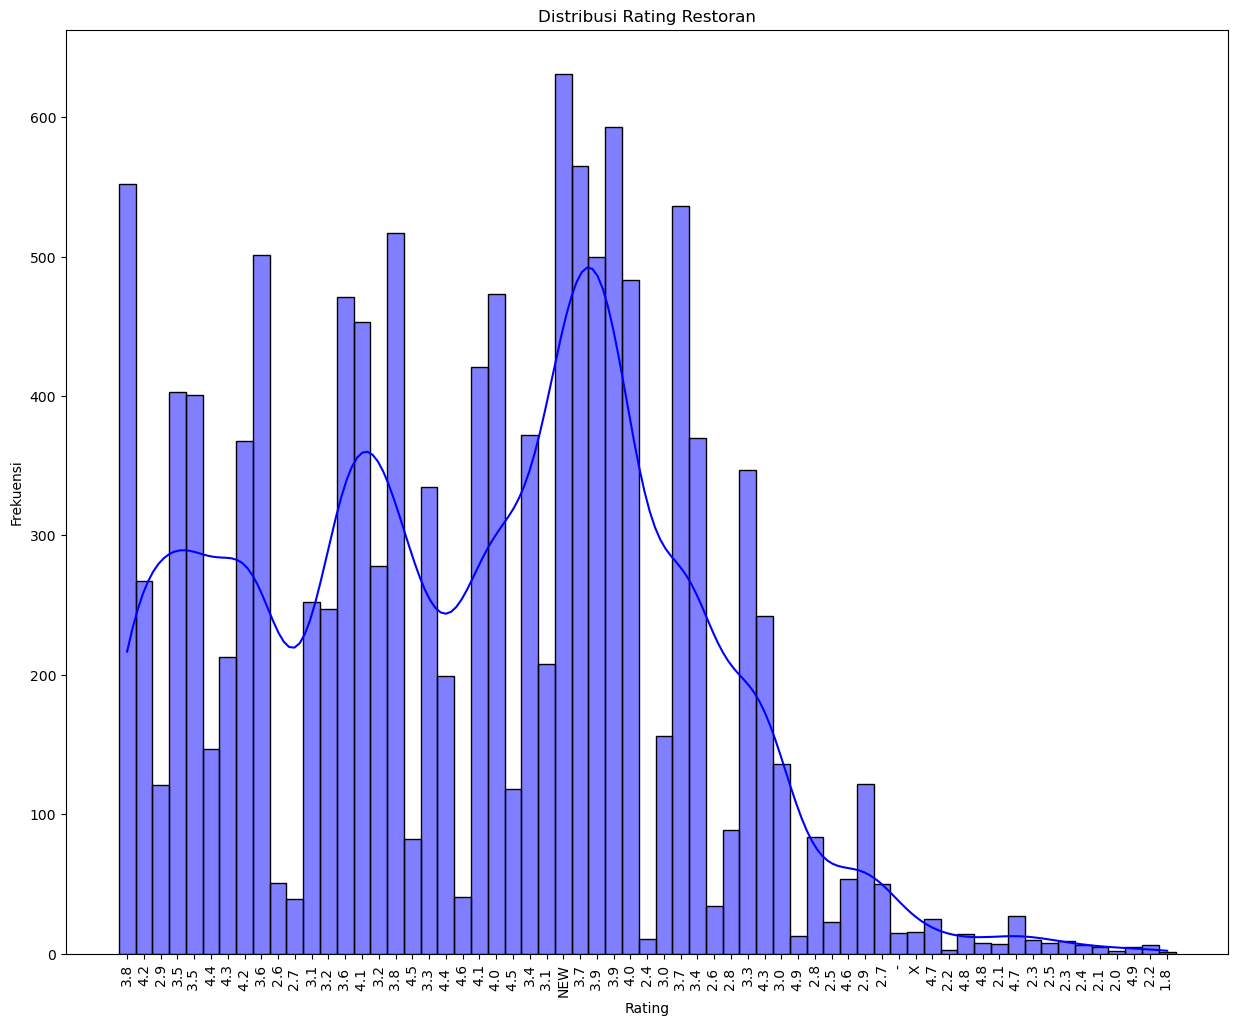

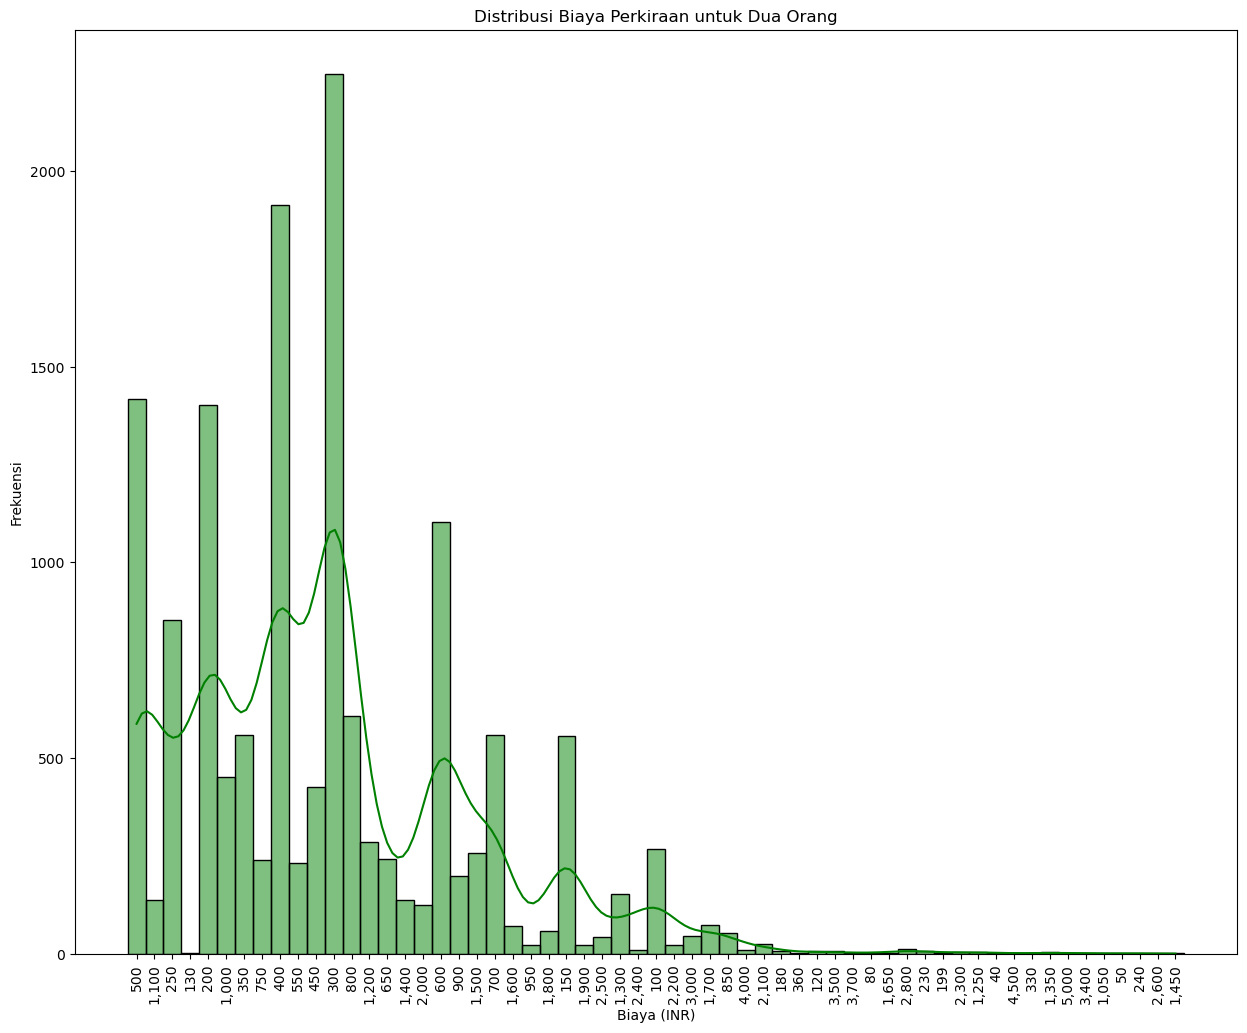

(url                               0
 name                              0
 online_order                      0
 book_table                        0
 rate                           2264
 votes                             0
 location                          8
 rest_type                        69
 cuisines                         12
 approx_cost(for two people)      92
 listed_in(type)                   0
 sell_beverages                   12
 sell_chinese_food                12
 sell_thai_food                   12
 sell_indian_food                 12
 sell_mediterranean_food          12
 sell_fast_food                   12
 sell_desserts                    12
 dtype: int64,
               votes
 count  15000.000000
 mean     285.355000
 std      812.512684
 min       -1.000000
 25%        7.000000
 50%       39.000000
 75%      197.000000
 max    16832.000000)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek jumlah missing values di setiap kolom
missing_values = data.isnull().sum()

# Statistik deskriptif data numerik
numeric_stats = data.describe()

# Plot distribusi rating
plt.figure(figsize=(15, 12))
sns.histplot(data['rate'].dropna(), bins=10, kde=True, color='blue')
plt.title('Distribusi Rating Restoran')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

# Plot distribusi biaya perkiraan untuk dua orang
plt.figure(figsize=(15, 12))
sns.histplot(data['approx_cost(for two people)'].dropna(), kde=True, bins=15, color='green')
plt.title('Distribusi Biaya Perkiraan untuk Dua Orang')
plt.xlabel('Biaya (INR)')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

# hasil
missing_values, numeric_stats

#### Missing Value

In [41]:
# Salin dataset asli untuk pemrosesan
cleaned_data = data.copy()

# 1. Menangani Missing Values
# Isi missing values pada 'rate' dengan rata-rata rating
cleaned_data['rate'] = pd.to_numeric(cleaned_data['rate'], errors='coerce')  # Konversi rate ke numerik
cleaned_data['rate'] = cleaned_data['rate'].fillna(cleaned_data['rate'].mean())

# Isi missing values pada 'location', 'rest_type', dan 'cuisines' dengan modus
for column in ['location', 'rest_type', 'cuisines']:
    cleaned_data[column] = cleaned_data[column].fillna(cleaned_data[column].mode()[0])

# Isi missing values pada kolom indikator makanan dengan 0
food_columns = ['sell_beverages', 'sell_chinese_food', 'sell_thai_food', 
                'sell_indian_food', 'sell_mediterranean_food', 'sell_fast_food', 'sell_desserts']
cleaned_data[food_columns] = cleaned_data[food_columns].fillna(0)

#### Menangani Anomali

In [44]:
# Ganti nilai -1 pada 'votes' dengan median
cleaned_data['votes'] = cleaned_data['votes'].replace(-1, cleaned_data['votes'][cleaned_data['votes'] != -1].median())

#### Mengonversi Format Data

In [47]:
# Kolom 'approx_cost(for two people)' - Hapus koma dan konversi ke numerik
cleaned_data['approx_cost(for two people)'] = cleaned_data['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Verifikasi hasil
print(cleaned_data.isnull().sum())  # Pastikan tidak ada missing values
print(cleaned_data.info())  # Cek kembali tipe data

url                             0
name                            0
online_order                    0
book_table                      0
rate                            0
votes                           0
location                        0
rest_type                       0
cuisines                        0
approx_cost(for two people)    92
listed_in(type)                 0
sell_beverages                  0
sell_chinese_food               0
sell_thai_food                  0
sell_indian_food                0
sell_mediterranean_food         0
sell_fast_food                  0
sell_desserts                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          15000 non-null  object 
 1   name                         15000 non-null  object 
 2   online_order                 

In [65]:
print(type(cosine_sim))
print(cosine_sim.shape)


<class 'numpy.ndarray'>
(15000, 15000)


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Gunakan kolom 'cuisines' atau kolom lain sebagai basis rekomendasi
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(cleaned_data['cuisines'].fillna(''))

# Matriks kesamaan kosinus
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [75]:
print(cleaned_data['name'].value_counts())

name
Cafe Coffee Day                  31
Onesta                           24
Faasos                           23
Burger King                      23
Petoo                            23
                                 ..
Banashankari Nati Style           1
Indian Tasty Kitchen              1
Cinnamon - Grills and Gourmet     1
Rural Blues                       1
Sri Vasavi Restaurant             1
Name: count, Length: 6121, dtype: int64


In [77]:
cleaned_data = cleaned_data.drop_duplicates(subset='name', keep='first')


In [79]:
print(cleaned_data[['name', 'cuisines']].head(10))


                   name                          cuisines
0                Faasos  North Indian, Biryani, Fast Food
1      Khanapur Express          North Indian, Rajasthani
2       Russh Gastropub      Continental, Italian, Burger
3    Bangalir Rannaghar    Bengali, North Indian, Chinese
4  Natural Mumbai Kulfi                         Ice Cream
5            Chai Resto                    Fast Food, Tea
6     Mimansa @ Foxtrot                              Cafe
7            Ciclo Cafe           Cafe, Italian, American
8       The Kebab House                    Kebab, Biryani
9   Sri Krishna Kitchen             North Indian, Chinese


In [81]:
def content_based_recommendations(restaurant_name, cosine_sim=cosine_sim, top_n=5):
    """
    Memberikan rekomendasi restoran berdasarkan kesamaan konten tanpa duplikasi.
    """
    restaurant_name = restaurant_name.lower().strip()

    # Cek apakah nama restoran ada di database
    if restaurant_name not in restaurant_indices:
        return "Restoran tidak ditemukan dalam database."

    # Ambil indeks restoran input
    idx = restaurant_indices[restaurant_name]

    # Dapatkan skor kesamaan
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))

    # Urutkan berdasarkan skor kesamaan (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top-n skor (skip restoran itu sendiri di indeks pertama)
    sim_scores = sim_scores[1:]  # Skip restoran itu sendiri
    recommended_restaurants = []

    for i, _ in sim_scores:
        restaurant = cleaned_data['name'].iloc[i]
        if restaurant not in recommended_restaurants:  # Hindari duplikasi
            recommended_restaurants.append(restaurant)
        if len(recommended_restaurants) == top_n:  # Stop jika mencapai top_n
            break

    return recommended_restaurants


In [83]:
print(content_based_recommendations("Pizza Hut"))
print(content_based_recommendations("McDonald's"))
print(content_based_recommendations("Domino's Pizza"))


['Bathinda Dine', 'Hotel Thazooq', 'Foodiction', 'Kerala Kitchen', 'Goodness! Beverages']
['Lassi Corner', 'Biriyani Bhatti', 'Khan Saheb Grills and Rolls', 'Bakingo', 'Hotel Marina']
['Bathinda Dine', 'Hotel Thazooq', 'Foodiction', 'Kerala Kitchen', 'Goodness! Beverages']


In [85]:
input_restaurant = "Faasos"  
recommendations = content_based_recommendations(input_restaurant)
print(f"Restoran input: {input_restaurant}")
for rec in recommendations:
    print(cleaned_data[cleaned_data['name'] == rec])


Restoran input: Faasos
                                                   url            name  \
419  https://www.zomato.com/bangalore/crave-bit-caf...  Crave Bit Cafe   

    online_order book_table      rate  votes  location rest_type cuisines  \
419           No         No  3.698766      0  JP Nagar      Cafe     Cafe   

     approx_cost(for two people) listed_in(type) sell_beverages  \
419                        600.0          Buffet            yes   

    sell_chinese_food sell_thai_food sell_indian_food sell_mediterranean_food  \
419                no             no               no                      no   

    sell_fast_food sell_desserts          combined_features  
419             no            no  Cafe JP Nagar Cafe Buffet  
                                                   url      name online_order  \
696  https://www.zomato.com/bangalore/tumbites-bell...  Tumbites          Yes   

    book_table  rate  votes   location    rest_type      cuisines  \
696         No   3.